In [1]:
#import libraries
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics
import seaborn as sns


In [2]:
#read csv files

email_df = pd.read_csv('Anonymous_mail_survey.csv')
email_df

,resp_nr,respons,sprivacy,sprivcen,shelp,shelpcen,sresp,srespcen,anonymity,personal,sinvolv,ssensit,sinvolvcen,ssensitcen,outliers
0,1,1,3.8,-0.33,5.00,-0.22,3.00,-1.75,1,1,1.81,0.93,-1.3,-0.46,1
1,4,1,5.0,0.87,5.75,0.53,4.50,-0.25,1,1,1.61,0.93,-1.5,-0.46,1
2,8,1,3.8,-0.33,5.00,-0.22,5.25,0.50,2,2,5.81,0.93,2.7,-0.46,1
3,9,1,5.2,1.07,3.25,-1.97,5.25,0.50,1,2,4.21,0.93,1.1,-0.46,1
4,11,1,3.6,-0.53,5.75,0.53,3.75,-1.00,2,2,2.01,0.93,-1.1,-0.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,592,1,3.4,-0.73,5.75,0.53,6.75,2.00,1,2,3.21,0.93,0.1,-0.46,1
300,597,1,4.4,0.27,5.00,-0.22,4.25,-0.50,1,2,3.81,1.13,0.7,-0.26,1
301,600,0,2.6,-1.53,2.00,-3.22,3.00,-1.75,1,2,4.61,1.93,1.5,0.54,1
302,601,0,4.0,-0.13,4.50,-0.72,5.25,0.50,2,2,3.41,0.93,0.3,-0.46,1


In [4]:
#infos about the data

email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   resp_nr     304 non-null    int64  
 1   respons     304 non-null    int64  
 2   sprivacy    304 non-null    float64
 3   sprivcen    304 non-null    float64
 4   shelp       304 non-null    float64
 5   shelpcen    304 non-null    float64
 6   sresp       304 non-null    float64
 7   srespcen    304 non-null    float64
 8   anonymity   304 non-null    int64  
 9   personal    304 non-null    int64  
 10  sinvolv     304 non-null    float64
 11  ssensit     304 non-null    float64
 12  sinvolvcen  304 non-null    float64
 13  ssensitcen  304 non-null    float64
 14  outliers    304 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 35.8 KB


In [5]:
# descriptive

email_df.describe()

,resp_nr,respons,sprivacy,sprivcen,shelp,shelpcen,sresp,srespcen,anonymity,personal,sinvolv,ssensit,sinvolvcen,ssensitcen,outliers
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,310.888158,0.631579,4.125000,-0.005000,5.220395,0.000395,4.745888,-0.004112,1.500000,1.500000,3.110658,1.393816,0.000658,0.003816,0.996711
std,172.541096,0.483172,0.950056,0.950056,1.039617,1.039617,1.181447,1.181447,0.500824,0.500824,1.733536,0.949278,1.733536,0.949278,0.057354
min,1.000000,0.000000,1.200000,-2.930000,1.250000,-3.970000,1.500000,-3.250000,1.000000,1.000000,0.810000,0.930000,-2.300000,-0.460000,0.000000
25%,158.750000,0.000000,3.600000,-0.530000,4.937500,-0.282500,4.000000,-0.750000,1.000000,1.000000,1.810000,0.930000,-1.300000,-0.460000,1.000000
50%,306.500000,1.000000,4.000000,-0.130000,5.500000,0.280000,4.750000,0.000000,1.500000,1.500000,3.210000,0.930000,0.100000,-0.460000,1.000000
75%,451.750000,1.000000,4.800000,0.670000,6.000000,0.780000,5.562500,0.812500,2.000000,2.000000,4.260000,1.530000,1.150000,0.140000,1.000000
max,603.000000,1.000000,7.000000,2.870000,7.000000,1.780000,7.000000,2.250000,2.000000,2.000000,6.810000,6.930000,3.700000,5.540000,1.000000


<AxesSubplot:>

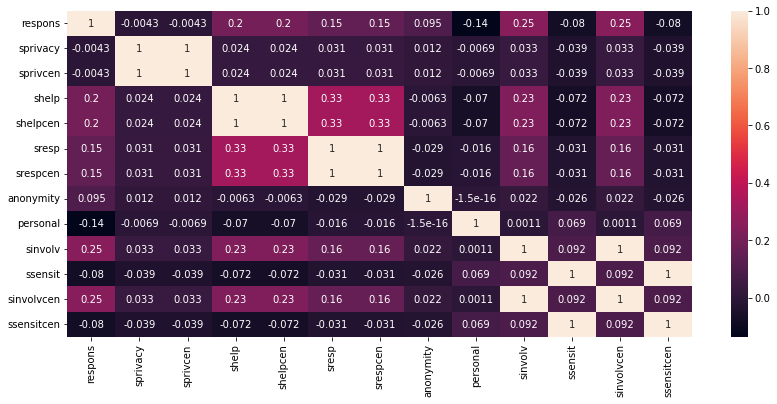

In [9]:
corr_df = email_df.drop(['resp_nr', 'outliers'], axis = 1).corr(method = 'pearson')
plt.figure(figsize=(14,6))
sns.heatmap(corr_df, annot=True)

In [6]:
#taking relevant data
model_df = email_df[['respons', 'sinvolv', 'anonymity']]
model_df

,respons,sinvolv,anonymity
0,1,1.81,1
1,1,1.61,1
2,1,5.81,2
3,1,4.21,1
4,1,2.01,2
...,...,...,...
299,1,3.21,1
300,1,3.81,1
301,0,4.61,1
302,0,3.41,2


In [11]:
predictor, target = model_df.drop('respons', axis = 1), model_df[['respons']]

print(predictor)
print(target)

     sinvolv  anonymity
0       1.81          1
1       1.61          1
2       5.81          2
3       4.21          1
4       2.01          2
..       ...        ...
299     3.21          1
300     3.81          1
301     4.61          1
302     3.41          2
303     4.81          1

[304 rows x 2 columns]
     respons
0          1
1          1
2          1
3          1
4          1
..       ...
299        1
300        1
301        0
302        0
303        0

[304 rows x 1 columns]


Using statsmodels for analysis


In [14]:
import statsmodels.api as sm

predictorX = sm.add_constant(predictor)
model1 = sm.Logit(target, predictorX).fit()
model1.summary()


Optimization terminated successfully.
         Current function value: 0.619965
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                respons   No. Observations:                  304
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Sep 2023   Pseudo R-squ.:                 0.05796
Time:                        01:46:52   Log-Likelihood:                -188.47
converged:                       True   LL-Null:                       -200.07
Covariance Type:            nonrobust   LLR p-value:                 9.203e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0470      0.449     -2.332      0.020      -1.927      -0.167
sinvolv        0.3312      0.077      4.305      0.000       0.180       0.482
anonymity      0.4050      0.248      1.636      0.102      -0.080       0.890
==============================================================================
"""